# HomeWork 2 for GEOG 210A F25

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import seaborn as sns

pd.options.display.float_format = '{:.2e}'.format

## Question 1: 
<font color="orange">
Load the population data (on Canvas) into your workspace..
</font>

In [2]:
pop = pd.read_csv("/Users/houpuli/Downloads/API_SP.POP.TOTL_DS2_en_csv_v2_551045.csv",skiprows=4)
pop_sel = pop.loc[[136,139,95],:].reset_index(drop=True)
pop_sel

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Low income,LIC,"Population, total",SP.POP.TOTL,1.15e+08,1.17e+08,1.20e+08,1.23e+08,1.26e+08,1.29e+08,...,5.01e+08,5.15e+08,5.30e+08,5.45e+08,5.61e+08,5.76e+08,5.91e+08,6.08e+08,6.25e+08,NaN
1,Lower middle income,LMC,"Population, total",SP.POP.TOTL,8.19e+08,8.40e+08,8.61e+08,8.83e+08,9.05e+08,9.27e+08,...,2.81e+09,2.85e+09,2.89e+09,2.93e+09,2.97e+09,3.01e+09,3.04e+09,3.08e+09,3.12e+09,NaN
2,High income,HIC,"Population, total",SP.POP.TOTL,9.08e+08,9.19e+08,9.31e+08,9.42e+08,9.53e+08,9.64e+08,...,1.37e+09,1.38e+09,1.39e+09,1.39e+09,1.39e+09,1.39e+09,1.40e+09,1.41e+09,1.42e+09,NaN


In [3]:
# Construct a clear dataframe for next analysis

# extract those columns including years
year_cols = [c for c in pop_sel.columns if c.isdigit()]
# construct a long format dataframe
pop_long = pop_sel.melt(
    id_vars=["Country Name"],     
    value_vars=year_cols,         
    var_name="year",              
    value_name="population"       
)
# convert year to int and pivot to wide format
pop_long["year"] = pop_long["year"].astype(int)
pop_wide = pop_long.pivot(
    index="year",
    columns="Country Name",
    values="population"
)
pop_wide = pop_wide.reset_index()
pop_wide.columns.name = None
pop_wide = pop_wide.rename(columns={
    "Low income": "low income",
    "Lower middle income": "lower middle income",
    "High income": "high income"
})

pop_inc = pop_wide[["year","low income","lower middle income","high income"]]
pop_inc

,year,low income,lower middle income,high income
0,1960,1.15e+08,8.19e+08,9.08e+08
1,1961,1.17e+08,8.40e+08,9.19e+08
2,1962,1.20e+08,8.61e+08,9.31e+08
3,1963,1.23e+08,8.83e+08,9.42e+08
4,1964,1.26e+08,9.05e+08,9.53e+08
...,...,...,...,...
60,2020,5.61e+08,2.97e+09,1.39e+09
61,2021,5.76e+08,3.01e+09,1.39e+09
62,2022,5.91e+08,3.04e+09,1.40e+09
63,2023,6.08e+08,3.08e+09,1.41e+09


## Question 2: 
<font color="orange">
Compare the population growth of high- and low-income countries.  

- a). Find the rows corresponding to the population of the following three sets of countries: Low income, lower middle income, and high income. Plot the population of these countries (in millions of people) on a semi-log plot (population on y-axis on log scale, time on x-axis on linear scale). Label the plot appropriately.
</font>

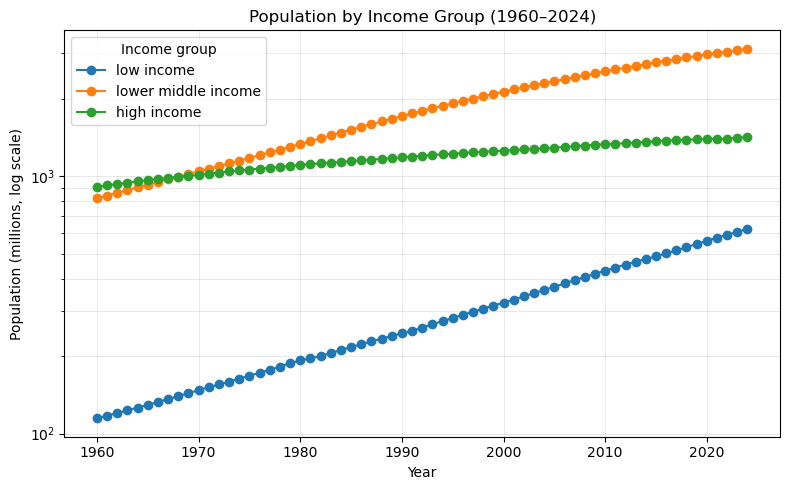

In [4]:
cols = ["low income", "lower middle income", "high income"]
plot_df = pop_inc.copy()

# 1) Ensure values are numeric and convert to millions
for c in cols:
    plot_df[c] = pd.to_numeric(plot_df[c], errors="coerce") / 1e6  # transfer into millions

# 2) plot the figure
plt.figure(figsize=(8,5))
for c, label in zip(
    cols, ["low income", "lower middle income", "high income"]
):
    y = plot_df[c].values
    x = pd.to_numeric(plot_df["year"], errors="coerce").values
    plt.plot(x, y, label=label, marker='o')

plt.yscale("log")
plt.xlabel("Year")
plt.ylabel("Population (millions, log scale)")
plt.title("Population by Income Group (1960–2024)")
plt.legend(title="Income group")
plt.grid(True, which="both", linewidth=0.4, alpha=0.5)
plt.tight_layout()
plt.show()

<font color="orange">
- b). Calculate the growth rates (in millions of people/year) of each set of countries in (a) and plot them as a function of time on a separate semi-log plot. Label the plot appropriately.
</font>

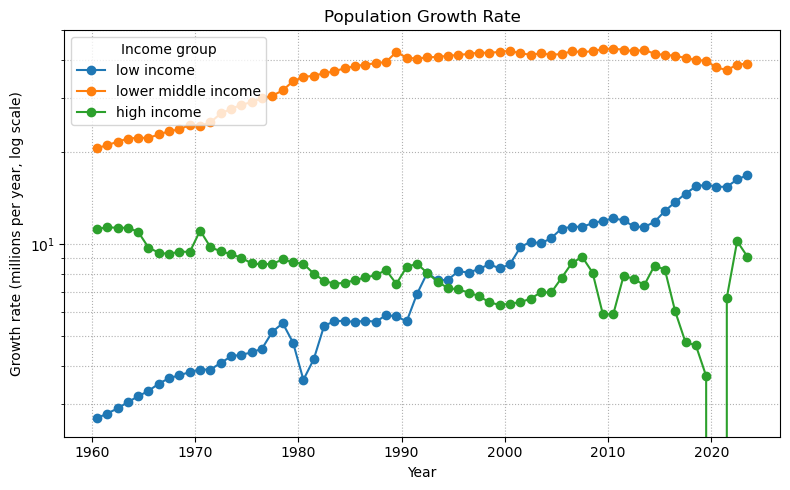

In [5]:
# because in the question a， we create a new dataframe plot_df(just transfer number of population into million level), so we use it to calculate the growth rate directly as below:

# Calculate and plot growth rates
cols = ["low income", "lower middle income", "high income"]
t = plot_df["year"].values

plt.figure(figsize=(8,5))
for c, label in zip(cols, ["low income", "lower middle income", "high income"]):
    y = plot_df[c].values   
    dy = np.diff(y)                       
    dt = np.diff(t)                       
    dydt = dy / dt                        
    t_mid = 0.5 * (t[1:] + t[:-1])        
    plt.plot(t_mid, dydt, label=label, marker='o')

plt.yscale("log")
plt.xlabel("Year")
plt.ylabel("Growth rate (millions per year, log scale)")
plt.title("Population Growth Rate")
plt.legend(title="Income group", loc="upper left")
plt.grid(True, which='both', linestyle=':')
plt.tight_layout()
plt.show()


<font color="orange">
- c). Examine the plots. Which set of countries (low income, lower middle income, or high income) is growing exponentially over the past ~6 decades? How can you tell?
</font>

Answer：From the shown above figure, I think the <font color='red'>low middle income countries(organe one)</font> is growing exponentially over the past ~6 decades. Because the population of low income countries shows a straight line in the semi-log plot.   
The specific mathematical expression of the exponential Function：
$$
P(t) = P_0 e^{at}
$$
- \( P0 \)：inital population  
- \( a \)：growth rate  
- \( t \)：time interval

and from the equation 
$$
\ln P(t) = \ln P_0 + at
$$ 
we can see that when y is semi-log, the exponential function will be a straight line, $\ln P(t)$ is the constant value, and a is the slop rate.

<font color="orange">
- d). When did the population growth rate of low-mid income countries reach a plateau?
</font>

Answer: From the second figure, I think the population growth rate of low-mid income countries reached a plateau at <font color='red'>the year 1990</font>. Because the growth rate of low-mid income countries (orange line) up to the summit around at 1990, and then it remained relatively constant after that year.

<font color="orange">
- e). Assume an exponential growth model of the form 

$$
P(t) = P_0 e^{at}
$$

for the population of low-income countries since 1960. Find the values of the constants Po and a by fitting a linear model to the log-transformed population data (you can use the numpyfunction polyfit.
</font>

In [6]:
t = plot_df["year"].to_numpy(dtype=float)
P = plot_df["low income"].to_numpy(dtype=float)  # unit： million

# ln P = ln P0 + a*(t - 1960)
t_vals = t - 1960
lnP = np.log(P)

# polyfit
a, lnP0 = np.polyfit(t_vals, lnP, 1)
P0 = np.exp(lnP0)

# results
print(f"P0 (1960) = {P0:.3f} million")
print(f"a = {a:.6f} per year")

P0 (1960) = 112.460 million
a = 0.026609 per year


<font color="orange">
- f). Write an expression for the growth rate of low-income countries based on the model you derived in (e).
</font>

Answer：  
The function for the growth rate is:

$$
P(t) = P_0 e^{at}
$$

and then

$$
\frac{dP}{dt} 
= a P_0 e^{at} 
= a P(t).
$$

from the question (e), we knew <font color='red'>P0 = 112.460 million</font> and <font color='red'>a = 0.026609</font> per year：

$$
\frac{dP}{dt} 
= 0.026609 \times 112.460 \times e^{0.026609t}.
$$

where t is the number of years since 1960(in other word, <font color='red'>real year - 1960</font>).


<font color="orange">
- g). Compare the actual population of low-income countries with that predicted by the model you derived in (e) (i.e. plot both model and data on the same plot). Using the exponential growth model, predict what the population of low-income countries will be in 2050.
</font>

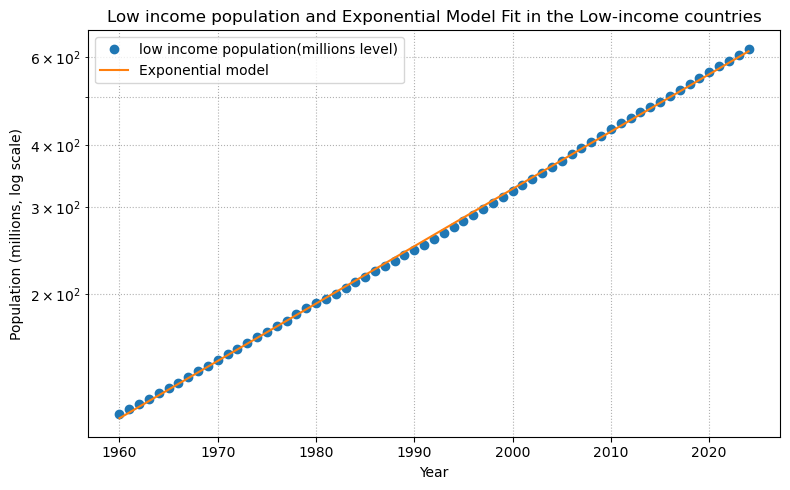

Predicted population in 2050 ≈ 1233.216 million


In [7]:
t = plot_df["year"].to_numpy(dtype=float)
P = plot_df["low income"].to_numpy(dtype=float)

# ln P = ln P0 + a*(t - 1960)
t_vals = t - 1960
LnP = np.log(P)

# polyfit
a, lnP0 = np.polyfit(t_vals, lnP, 1)
P0 = np.exp(lnP0)

# 3) calculate fitted curve (aligned with data years)
P_fit = P0 * np.exp(a * (t - 1960.0))

# 4) plot the figure
plt.figure(figsize=(8,5))
plt.plot(t, P, 'o', label='low income population(millions level)')
plt.plot(t, P_fit, '-', label='Exponential model')

plt.yscale("log")
plt.xlabel("Year")
plt.ylabel("Population (millions, log scale)")
plt.title("Low income population and Exponential Model Fit in the Low-income countries")
plt.legend(loc="upper left")
plt.grid(True, which='both', linestyle=':')
plt.tight_layout()
plt.show()

# 5) predict the population in 2050(millions level)
P_2050 = P0 * np.exp(a * (2050 - 1960))
print(f"Predicted population in 2050 ≈ {P_2050:.3f} million")

## Question 3: 
<font color="orange">
Analyze the population of Japan.  

- a). Plot the population of Japan (in millions of people) over time since 1960.
</font>

In [8]:
# First of all, We need re-constrauct our dataset

pop = pd.read_csv("/Users/houpuli/Downloads/API_SP.POP.TOTL_DS2_en_csv_v2_551045.csv",skiprows=4)
pop_sel_japan = pop.loc[[119],:].reset_index(drop=True)

# extract those columns including years
year_cols = [c for c in pop_sel_japan.columns if c.isdigit()]
# construct a long format dataframe
pop_long_japan = pop_sel_japan.melt(
    id_vars=["Country Name"],     
    value_vars=year_cols,         
    var_name="year",              
    value_name="population"       
)
# convert year to int and pivot to wide format
pop_long_japan["year"] = pop_long_japan["year"].astype(int)
pop_inc_japan = pop_long_japan.pivot(
    index="year",
    columns="Country Name",
    values="population"
)
pop_inc_japan = pop_inc_japan.reset_index()
pop_inc_japan.columns.name = None

pop_inc_japan = pop_inc_japan.rename(columns={"Japan": "population_japan"})
pop_inc_japan

,year,population_japan
0,1960,9.32e+07
1,1961,9.41e+07
2,1962,9.49e+07
3,1963,9.59e+07
4,1964,9.69e+07
...,...,...
60,2020,1.26e+08
61,2021,1.26e+08
62,2022,1.25e+08
63,2023,1.25e+08


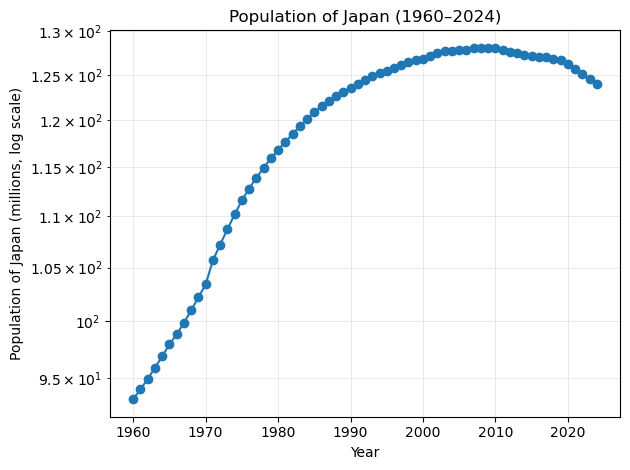

In [9]:
# transfer the unit of population into million level
pop_inc_japan["population_japan"] = pop_inc_japan["population_japan"] / 1e6

y = pop_inc_japan["population_japan"].values
x = pd.to_numeric(plot_df["year"], errors="coerce").values
plt.plot(x, y, label=label, marker='o')

plt.yscale("log")
plt.xlabel("Year")
plt.ylabel("Population of Japan (millions, log scale)")
plt.title("Population of Japan (1960–2024)")
plt.grid(True, which="both", linewidth=0.4, alpha=0.5)
plt.tight_layout()
plt.show()

<font color="orange">
- b). Fit a 2nd-degree polynomial to describe the population of Japan as a function of time since 1960 (use the numpy function polyfit). Write the equation. Plot the modeled population of Japan on the same plot as (a).
</font>

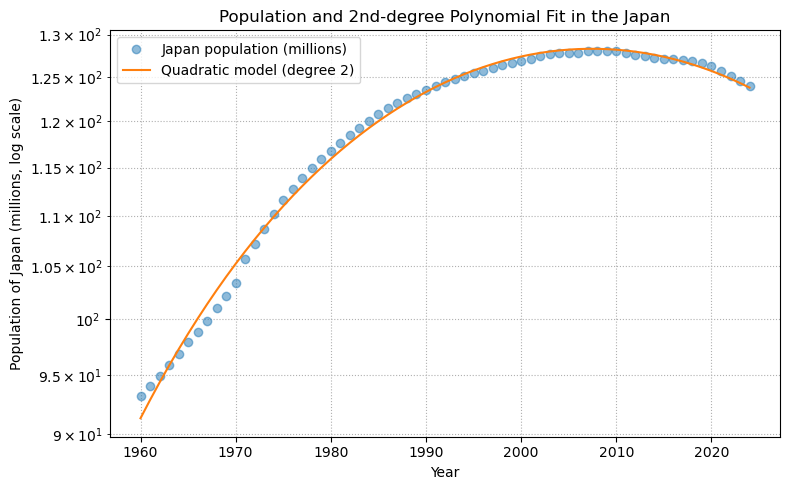

P(t) ≈ 91.2982 + 1.560191·(t-1960) + -0.01644474·(t-1960)^2  (millions)


In [10]:
t = pop_inc_japan["year"].to_numpy(dtype=float)
P = pop_inc_japan["population_japan"].to_numpy(dtype=float)  # 已是 millions
t_vals = t - 1960  # time since 1960

# 2) 2nd-degree polynomial：P ≈ b0 + b1*t_vals + b2*t_vals^2
b2, b1, b0 = np.polyfit(t_vals, P, 2)

# 3) calculate the 2nd-degree polynomial fitted curve
P_fit = b0 + b1*t_vals + b2*(t_vals**2)

# 4) plot the figure
plt.figure(figsize=(8,5))
plt.plot(t, P, 'o', label='Japan population (millions)',alpha=0.5)
plt.plot(t, P_fit, '-', label='Quadratic model (degree 2)')

plt.yscale("log")
plt.xlabel("Year")
plt.ylabel("Population of Japan (millions, log scale)")
plt.title("Population and 2nd-degree Polynomial Fit in the Japan")
plt.legend(loc="upper left")
plt.grid(True, which="both", linestyle=':')
plt.tight_layout()
plt.show()

# 5) print the fitted polynomial equation
print(f"P(t) ≈ {b0:.4f} + {b1:.6f}·(t-1960) + {b2:.8f}·(t-1960)^2  (millions)")

<font color="orange">
- c). Expand the polynomial you determined in (b) in a Taylor series at year 2019. Write the expression.
</font>

In [11]:
t = pop_inc_japan["year"].to_numpy(dtype=float)
P = pop_inc_japan["population_japan"].to_numpy(dtype=float)  # 已是 millions
t_vals = t - 1960  # time since 1960
# 2) 2nd-degree polynomial：P ≈ b0 + b1*t_vals + b2*t_vals^2
b2, b1, b0 = np.polyfit(t_vals, P, 2)


c0 = b0 + b1*(2019-1960) + b2*(2019-1960)**2          # = P(2019)
c1 = b1 + 2*b2*(2019-1960)                            # = P'(2019)
c2 = b2                                               # = b2
print(f"P(t) ≈ {c0:.4f} + {c1:.6f}(t-2019) + {c2:.8f}(t-2019)^2  (millions)")

P(t) ≈ 126.1053 + -0.380288(t-2019) + -0.01644474(t-2019)^2  (millions)


<font color="orange">
- d). Predict the population of Japan in 2050 in 3 different ways: (i) Using the polynomial model you determined in (b), (ii) using only the first 2 terms in the Taylor series you determined in (c), and (iii) using the first 3 terms in the Taylor series you determined in (c). Discuss how the answers compare.
</font>

In [12]:
# polynomial parameter calculation(using 1960 as the base year)
t = pop_inc_japan["year"].to_numpy(dtype=float)
P = pop_inc_japan["population_japan"].to_numpy(dtype=float)
t_vals = t - 1960  # time since 1960
b2, b1, b0 = np.polyfit(t_vals, P, 2)

#  polynomial model (base year 1960)
def predict_polynomial(year):
    t = year - 1960
    return b0 + b1*t + b2*t**2

# Taylor coefficients at year 2019
t0 = 2019 - 1960
c0 = b0 + b1*t0 + b2*t0**2          # P(2019)
c1 = b1 + 2*b2*t0                   # P'(2019)
c2 = b2                             # P''(2019)/2

# (ii) 2-term Taylor expansion (base year 2019)
def predict_taylor_2(year):
    t = year - 2019
    return c0 + c1*t

# (iii) 3-term Taylor expansion (base year 2019)
def predict_taylor_3(year):
    t = year - 2019
    return c0 + c1*t + c2*t**2

# ===== Test: Predict population in 2050 =====
year_pred = 2050

p1 = predict_polynomial(year_pred)
p2 = predict_taylor_2(year_pred)
p3 = predict_taylor_3(year_pred)

print(f"i).Polynomial model prediction in 2050:   {p1:.3f} million")
print(f"ii).Taylor 2-term prediction in 2050:    {p2:.3f} million")
print(f"iii).Taylor 3-term prediction in 2050:   {p3:.3f} million")

i).Polynomial model prediction in 2050:   98.513 million
ii).Taylor 2-term prediction in 2050:    114.316 million
iii).Taylor 3-term prediction in 2050:   98.513 million


Discussion about the difference in predictions:  

The <font color='red'>polynomial model</font> and the <font color='red'>3-term Taylor expansion</font> are essentially the same, so their predictions are identical. In contrast, the <font color='red'>2-term Taylor expansion</font> ignores the quadratic term (which represents the <font colore=red>acceleration of population change</font>), and its linear extrapolation leads to a significant overestimation of the 2050 population. This demonstrates that when the prediction point is far from the base point, the error of a low-order Taylor approximation grows rapidly.